In [1]:
%%time
import pandas as pd
import numpy as np
import pymc3 as mc

Couldn't import dot_parser, loading of dot files will not be possible.
CPU times: user 1.41 s, sys: 427 ms, total: 1.84 s
Wall time: 2.28 s


In [2]:
df=pd.read_table('multivsamp.csv',sep=';')
df.head()

,id2,IM_MAX_SDO_MEDIO_12M,IM_PROM_HIPOTECA_12M,IM_PROM_PREST_NOM_12M,IM_PROM_AUTO_12M,IM_PROM_PPIS_12M,IM_PROM_OTRO_12M,IM_PROM_CARTERA_12M,IM_PROM_SDO_CORTE_12M,IM_PROM_SDO_MEDIO_12M,...,TP_PERSONA,TP_DOMICILIO,CD_ESTADO,CD_EDO_CIVIL,CD_SEGMENTACION,CD_SEXO,CD_OCUPACION,CD_RESIDENCIA,TP_VIVIENDA_SEPO,contrata
0,1,1100.00,0.0,0.000,0.0,0.0,0.0,0.0,0.00,1100.00,...,F,H,NL,C,R1,M,SER,MEX,NaN,0
1,5,22836.13,0.0,2445.065,0.0,0.0,0.0,0.0,2633.32,8718.87,...,F,H,DF,S,B1,M,MED,MEX,CASA,0
2,16,5936.92,0.0,90829.800,0.0,0.0,0.0,0.0,74654.69,1547.00,...,F,H,SI,C,F9,F,ASG,MEX,CASA,0
3,17,541013.76,0.0,0.000,0.0,0.0,0.0,0.0,0.00,498718.13,...,F,H,NaN,C,Q1,F,PEN,MEX,NaN,0
4,62,5059.81,0.0,0.000,0.0,0.0,0.0,0.0,0.00,2682.58,...,F,H,NL,C,B1,M,PEN,MEX,NaN,0


In [3]:
df=df[['TP_SEGMENTO_FINAL2','contrata','TO_PROM_TO_CARGOS_3M','NU_VINC_COGNODATA','TO_NECESIDAD_FINAN_CAP_3M','IM_PROM_GASTOS_3M','IM_SUM_SDO_CORTE_1M']]

In [4]:
import pandas as pd
import pymc3 as pm
import matplotlib.pyplot as plt
import numpy as np
import theano.tensor as t
from scipy.stats import mode
def tinvlogit(x):
    return t.exp(x) / (1 + t.exp(x))
df.head()
#df=pd.read_csv('/home/ryan/Documents/thads2013n.txt',sep=',') df=df[df['BURDEN']>0] df=df[df['AGE1']>0] df['OWN']=[1 if obj=='2' else 0 for obj in df['OWNRENT']]

,TP_SEGMENTO_FINAL2,contrata,TO_PROM_TO_CARGOS_3M,NU_VINC_COGNODATA,TO_NECESIDAD_FINAN_CAP_3M,IM_PROM_GASTOS_3M,IM_SUM_SDO_CORTE_1M
0,PAREJAS ADULTAS,0,0.000000,1,0.000000,0.000000,NaN
1,ADULTOS INDEPENDIENTES,0,8.333333,4,5.431283,115592.358890,1488.45
2,JOVEN PROFESIONAL,0,9.666667,14,544.893976,583913.833340,96112.75
3,RETIRADOS,0,16.666667,5,0.038541,18776.530000,NaN
4,RETIRADOS,0,1.000000,1,1.821699,7166.666667,NaN


In [5]:
%matplotlib inline
df=df[df['TP_SEGMENTO_FINAL2'].isin(['ADULTO EN PLENITUD', 'ADULTOS INDEPENDIENTES', 'DIVORCIADO',
       'HOGARES CON HIJOS',
       'JOVEN PROFESIONAL', 'JOVEN TRABAJADOR', 'PAREJA JOVEN',
       'PAREJAS ADULTAS', 'PAREJAS SENIOR'])]

In [6]:
df=df.fillna(0)
df.head()

,TP_SEGMENTO_FINAL2,contrata,TO_PROM_TO_CARGOS_3M,NU_VINC_COGNODATA,TO_NECESIDAD_FINAN_CAP_3M,IM_PROM_GASTOS_3M,IM_SUM_SDO_CORTE_1M
0,PAREJAS ADULTAS,0,0.000000,1,0.000000,0.00000,0.00
1,ADULTOS INDEPENDIENTES,0,8.333333,4,5.431283,115592.35889,1488.45
2,JOVEN PROFESIONAL,0,9.666667,14,544.893976,583913.83334,96112.75
5,HOGARES CON HIJOS,0,10.666667,9,14.605193,257359.42091,12107.68
7,HOGARES CON HIJOS,0,0.000000,2,0.000000,0.00000,0.00


In [7]:
new={'ADULTO EN PLENITUD':1, 'ADULTOS INDEPENDIENTES':2, 'DIVORCIADO':3,
       'HOGARES CON HIJOS':4,
       'JOVEN PROFESIONAL':5, 'JOVEN TRABAJADOR':6, 'PAREJA JOVEN':7,
       'PAREJAS ADULTAS':8, 'PAREJAS SENIOR':9}

In [8]:
#new['ADULTO EN PLENITUD']
df['Segmento']=df['TP_SEGMENTO_FINAL2'].apply(lambda x: new[x])
df.head()

,TP_SEGMENTO_FINAL2,contrata,TO_PROM_TO_CARGOS_3M,NU_VINC_COGNODATA,TO_NECESIDAD_FINAN_CAP_3M,IM_PROM_GASTOS_3M,IM_SUM_SDO_CORTE_1M,Segmento
0,PAREJAS ADULTAS,0,0.000000,1,0.000000,0.00000,0.00,8
1,ADULTOS INDEPENDIENTES,0,8.333333,4,5.431283,115592.35889,1488.45,2
2,JOVEN PROFESIONAL,0,9.666667,14,544.893976,583913.83334,96112.75,5
5,HOGARES CON HIJOS,0,10.666667,9,14.605193,257359.42091,12107.68,4
7,HOGARES CON HIJOS,0,0.000000,2,0.000000,0.00000,0.00,4


In [9]:
# %load std_ipython_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pymc3 as pm
import theano.tensor as tt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from scipy.stats import beta
from scipy.special import expit
from matplotlib import gridspec
from IPython.display import Image

%matplotlib inline
plt.style.use('seaborn-white')

color = '#87ceeb'

f_dict = {'size':16}

In [10]:
len(df)

161868

In [11]:
from sklearn.cross_validation import train_test_split 
X = df[['TO_PROM_TO_CARGOS_3M','NU_VINC_COGNODATA','TO_NECESIDAD_FINAN_CAP_3M',
        'IM_PROM_GASTOS_3M','IM_SUM_SDO_CORTE_1M','Segmento']]
y = df['contrata']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=6)
c_train=X_train['Segmento']
c_test=X_test['Segmento']

from sklearn import preprocessing 
scalerx = preprocessing.StandardScaler().fit(X_train[['TO_PROM_TO_CARGOS_3M','NU_VINC_COGNODATA','TO_NECESIDAD_FINAN_CAP_3M',
        'IM_PROM_GASTOS_3M','IM_SUM_SDO_CORTE_1M']])
X_train=scalerx.transform(X_train[['TO_PROM_TO_CARGOS_3M','NU_VINC_COGNODATA','TO_NECESIDAD_FINAN_CAP_3M',
        'IM_PROM_GASTOS_3M','IM_SUM_SDO_CORTE_1M']])
X_test=scalerx.transform(X_test[['TO_PROM_TO_CARGOS_3M','NU_VINC_COGNODATA','TO_NECESIDAD_FINAN_CAP_3M',
        'IM_PROM_GASTOS_3M','IM_SUM_SDO_CORTE_1M']])


/home/abraham/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [12]:
zX = X_train
y=y_train

nclase=len(c_train.unique())
clase_idx=c_train.values
clase_idx

array([5, 4, 8, ..., 2, 7, 9])

In [13]:
nclase

9

In [14]:
print(np.mean(y),np.mean(y_test))

0.012302858605381838 0.01247914993513313


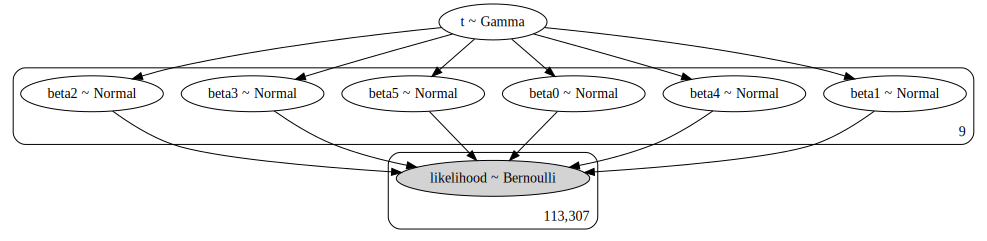

In [15]:
from pymc3 import Model, sample, Normal, HalfCauchy, Uniform, model_to_graphviz
with pm.Model() as model_weight:
    
    t=pm.Gamma('t',alpha=0.001,beta=0.001)
    
    beta0 = pm.Normal('beta0', mu=0, tau=t,shape=nclase)
    beta1 = pm.Normal('beta1', mu=0, tau=t,shape=nclase)
    beta2 = pm.Normal('beta2', mu=0, tau=t,shape=nclase)
    beta3 = pm.Normal('beta3', mu=0, tau=t,shape=nclase)
    beta4 = pm.Normal('beta4', mu=0, tau=t,shape=nclase)
    beta5 = pm.Normal('beta5', mu=0, tau=t,shape=nclase)
    #beta6 = pm.Normal('beta6', mu=0, tau=t,shape=nclase)
            
        
    p = pm.invlogit(beta0[clase_idx-1] + beta1[clase_idx-1]*zX[:,0]+beta2[clase_idx-1]*zX[:,1]
                    +beta3[clase_idx-1]*zX[:,2]+beta4[clase_idx-1]*zX[:,3]+
                   beta5[clase_idx-1]*zX[:,4])#+beta6[clase_idx-1]*zX[:,5])
        
    likelihood = pm.Bernoulli('likelihood', p, observed=y.values)
    
    #posterior=pm.Deterministic('posterior',likelihood*1)

model_to_graphviz(model_weight)

In [ ]:
%%time
with model_weight:
    trace1 = pm.sample(10000,tune=1000, cores=2)    

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [beta5, beta4, beta3, beta2, beta1, beta0, t]
Sampling 2 chains:   7%|▋         | 1440/22000 [7:35:11<121:58:52, 21.36s/draws]

In [18]:
sal=pm.summary(trace1) 
sal

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
beta0__0,-0.038115,0.300127,0.030013,-0.338242,0.262012,1.0005,3.308015e+06
beta0__1,0.203757,0.559163,0.055916,-0.355407,0.762921,1.0005,3.019801e+06
beta0__2,-0.571432,0.274520,0.027452,-0.845952,-0.296912,1.0005,2.029900e+06
beta0__3,0.033278,0.710771,0.071077,-0.677493,0.744050,1.0005,3.443276e+06
beta0__4,0.473962,0.041728,0.004173,0.432234,0.515689,1.0005,5.304184e+05
beta0__5,-0.402911,0.236979,0.023698,-0.639890,-0.165932,1.0005,2.443113e+06
beta0__6,0.335690,0.656604,0.065660,-0.320914,0.992294,1.0005,6.218683e+06
beta0__7,-0.103871,0.405549,0.040555,-0.509420,0.301679,1.0005,3.719866e+06
beta0__8,0.490355,0.149352,0.014935,0.341004,0.639707,1.0005,1.921982e+06
beta1__0,0.464946,0.135021,0.013502,0.329925,0.599967,1.0005,1.096817e+06


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3d11ff5a20>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f3d11ccac50>]], dtype=object)

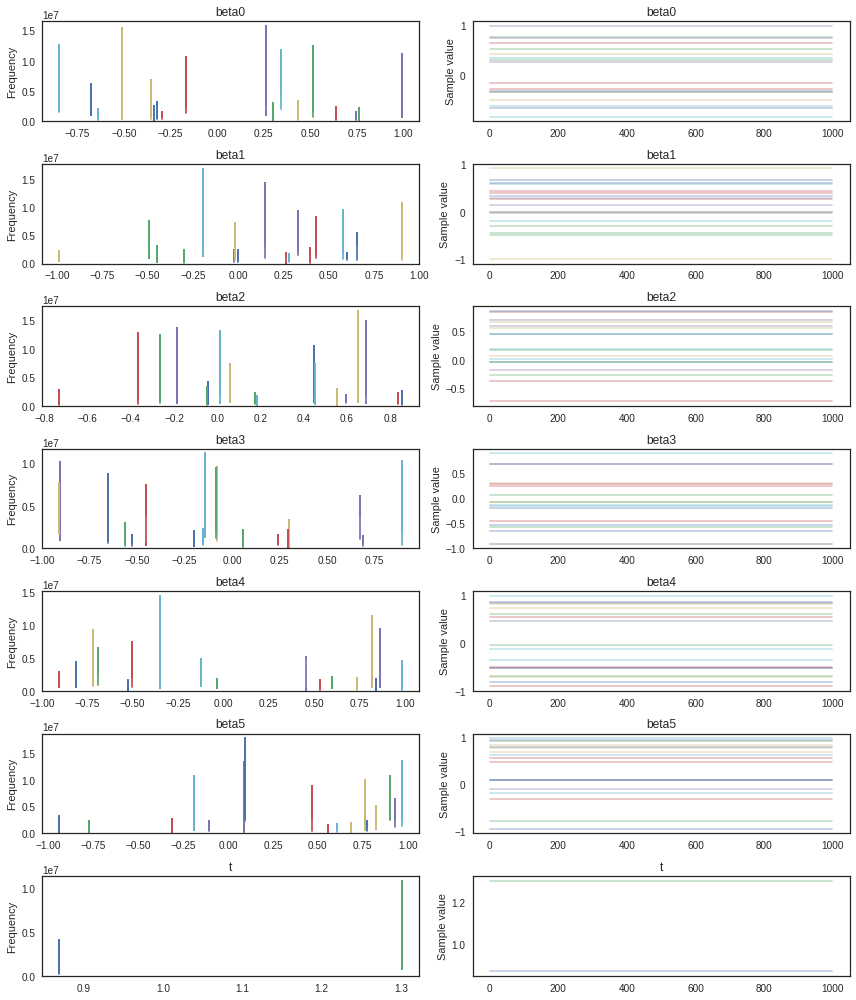

In [19]:
pm.traceplot(trace1)

KeyError: 'Unknown variable beta6'

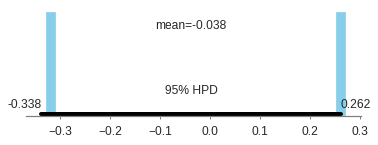

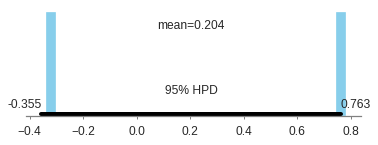

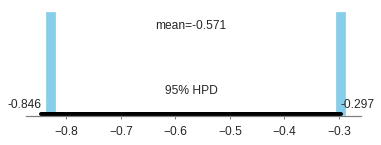

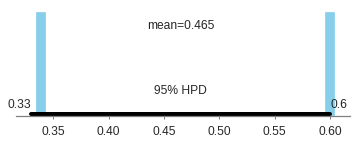

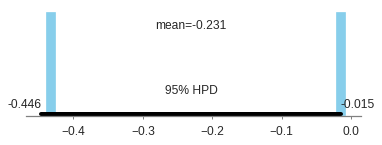

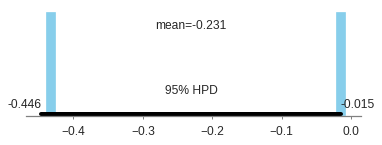

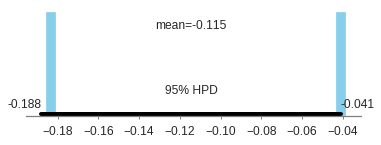

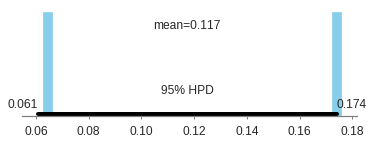

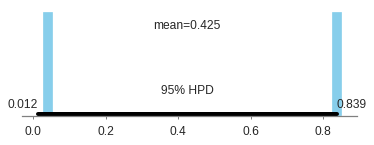

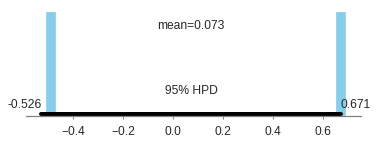

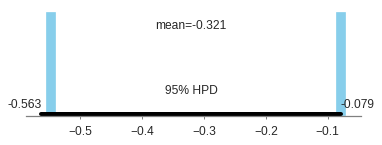

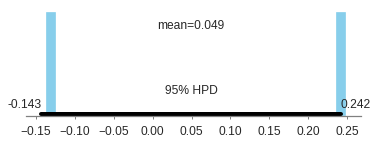

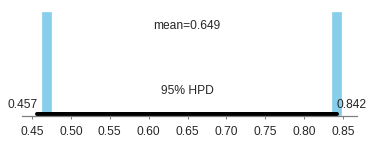

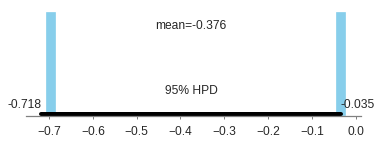

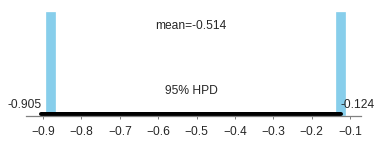

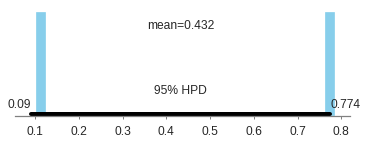

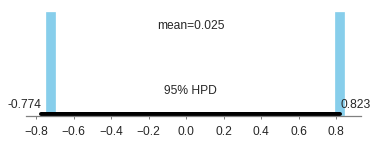

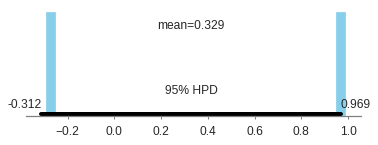

In [20]:
#'state','cardholder','balance','numTrans','numIntlTrans','creditLine'
pm.plot_posterior(trace1['beta0'][:,0])
pm.plot_posterior(trace1['beta0'][:,1])
pm.plot_posterior(trace1['beta0'][:,2])
pm.plot_posterior(trace1['beta1'][:,0])
pm.plot_posterior(trace1['beta1'][:,1])
pm.plot_posterior(trace1['beta1'][:,1])
pm.plot_posterior(trace1['beta2'][:,0])
pm.plot_posterior(trace1['beta2'][:,1])
pm.plot_posterior(trace1['beta2'][:,2])
pm.plot_posterior(trace1['beta3'][:,0])
pm.plot_posterior(trace1['beta3'][:,1])
pm.plot_posterior(trace1['beta3'][:,2])
pm.plot_posterior(trace1['beta4'][:,0])
pm.plot_posterior(trace1['beta4'][:,1])
pm.plot_posterior(trace1['beta4'][:,2])
pm.plot_posterior(trace1['beta5'][:,0])
pm.plot_posterior(trace1['beta5'][:,1])
pm.plot_posterior(trace1['beta5'][:,2])
pm.plot_posterior(trace1['beta6'][:,0])
pm.plot_posterior(trace1['beta6'][:,1])
pm.plot_posterior(trace1['beta6'][:,2])
plt.show()

In [23]:
from math import*
def invlogit(x):
    return exp(x) / (1 + exp(x))

def predict(zX,clase_idx):
    p = trace1['beta0'][:,clase_idx-1].mean() + trace1['beta1'][:,clase_idx-1].mean()*zX[:,0]+trace1['beta2'][:,clase_idx-1].mean()*zX[:,1]+trace1['beta3'][:,clase_idx-1].mean()*zX[:,2]+trace1['beta4'][:,clase_idx-1].mean()*zX[:,3]+trace1['beta5'][:,clase_idx-1].mean()*zX[:,4]#+trace1['beta6'][:,clase_idx-1].mean()*zX[:,5]
    p=np.array([invlogit(i) for i in p])
    return(p)

In [24]:
pf=predict(X_test,c_test.values)
#X_test[0,:]
#c_test.values[0]
pf

array([ 0.48022355,  0.51867083,  0.62763341, ...,  0.80906135,
        0.48075352,  0.44743204])

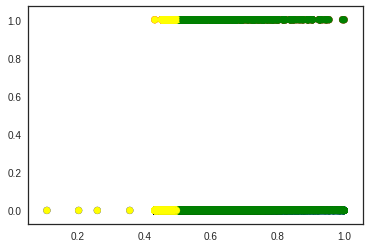

In [25]:
plt.scatter(pf,y_test,color=['red' if i==1 else 'blue' for i in y_test])
plt.scatter(pf,y_test,color=['green' if i>=0.5 else 'yellow' for i in pf])
#plt.plot(pf,'p',color='red')

In [26]:
np.mean(y_test)

0.01247914993513313

In [27]:
from sklearn.metrics import confusion_matrix,classification_report
pred=[1 if i>=0.5 else 0 for i in pf]
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

             precision    recall  f1-score   support

          0       1.00      0.65      0.78     47955
          1       0.03      0.75      0.05       606

avg / total       0.98      0.65      0.77     48561

[[30941 17014]
 [  154   452]]


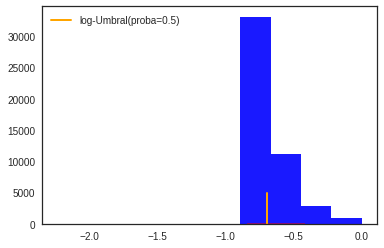

In [28]:
plt.hist(np.array([log(i) for i in pf[np.where(y_test==0)]]),color='blue',alpha=0.9)
plt.hist(np.array([log(i) for i in pf[np.where(y_test==1)]]),color='red',alpha=0.5)
plt.plot([-0.6931471805599453, -0.6931471805599453], [0, 5000], 'r-',label='log-Umbral(proba=0.5)',linewidth=2,color='orange')
plt.legend()

In [204]:
log(0.5)

-0.6931471805599453

In [45]:
ppc['likelihood'][0]

array([0, 0, 0, ..., 0, 0, 0])

100%|██████████| 100/100 [00:06<00:00, 16.55it/s]


TypeError: slice indices must be integers or None or have an __index__ method

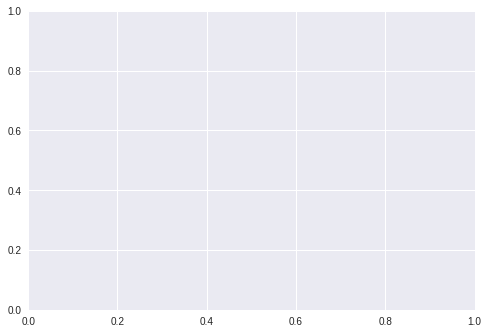

In [19]:
import seaborn as sns; sns.set()
ppc=pm.sample_ppc(trace1, model=model_weight, samples=100)
sns.kdeplot(y,c='b')
for i in range(100):
    sns.kdeplot(ppc['likelihood'][:,i], alpha=0.1, c='g')

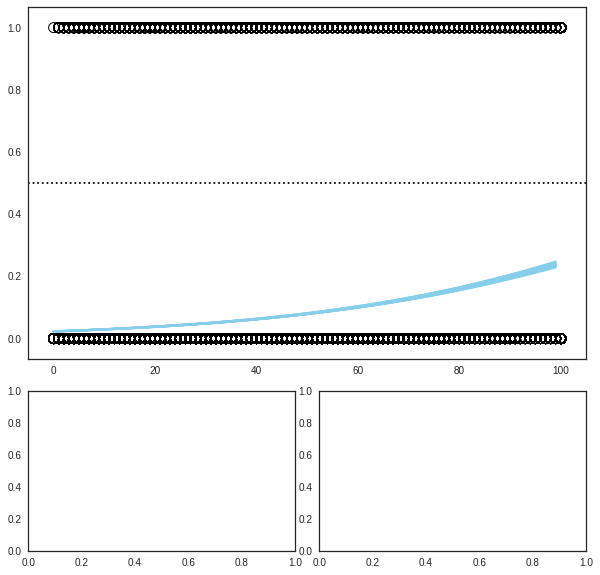

In [66]:
# Transform parameters back to original scale
beta0 = trace1['beta0'] - trace1['zbetaj']*meanx[1]/scalex[1]
betaj = (trace1['betaj']/scalex[1])

plt.figure(figsize=(10,10))
# Define gridspec
gs = gridspec.GridSpec(3, 4)
ax1 = plt.subplot(gs[:2,:4])
ax2 = plt.subplot(gs[2,:2])
ax3 = plt.subplot(gs[2,2:])

ax1.scatter(df.numTrans, df.fraudRisk, s=100, edgecolor='k', facecolors='None', lw=1)

# Take 20 values from the posterior distribution and plot the lines
n_curves = 20
tr_len = len(trace1)
stepIdxVec = np.arange(0, tr_len, tr_len//n_curves)
weight_span = np.arange(df.numTrans.min(), df.numTrans.max())
weights = np.tile(weight_span.reshape(-1,1), (1,n_curves))
# The expit function from scipy.special calculates the inverse of the logit function
p = expit(beta0[stepIdxVec] + betaj[stepIdxVec]*weights)
ax1.plot(weights, p, c=color)

ax1.axhline(y=0.5, color='k', linestyle='dotted')



In [71]:
# Look up weights for which of the posterior probabilities is (close to) 0.5
decision_boundary = weight_span[np.any(np.isclose(p, 0.1, atol=0.01), axis=1)]
# Highlight the weightspan
ax1.axvspan(decision_boundary.min(), decision_boundary.max(),
            0, 0.5, color=color, alpha=0.3)

ax1.set_xlabel('numTrans')
ax1.set_ylabel('fraudRisk')
ax1.set_title('Data with Post. Pred.')

pm.plot_posterior(beta0, point_estimate='mode', ax=ax2, color=color)
ax2.set_title('Intercept', fontdict=f_dict)
ax2.set_xlabel(r'$\beta_0$', fontdict=f_dict)

pm.plot_posterior(betaj, point_estimate='mode', ax=ax3, color=color)
ax3.set_title('numTrans', fontdict=f_dict)
ax3.set_xlabel(r'$\beta_1$', fontdict=f_dict);

plt.tight_layout();

In [77]:
import pydot
from pydot import*
print (pydot.find_graphviz())

AttributeError: module 'pydot' has no attribute 'find_graphviz'